In [26]:
folder_path = "/SoundData"
Twok = "/2k/"
Fourk = "/4k/"
Eightk = "/8k/"
Sixteenk = "/16k/"
TwentyTwok = "/22k/"
Sample_folders = [Twok, Fourk, Eightk, Sixteenk, TwentyTwok]

In [3]:
fold_paths = [f"C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold{i+1}/" for i in range(10)]

In [1]:
import os
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt

C:\Users\jta20\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [20]:
import os

file_names = []

for i in range(len(fold_paths)):
    for root, dirs, files in os.walk(fold_paths[i]):
        data = []
        for f in files:
            if f[-4:] == ".wav":
                data.append(str(fold_paths[i]) + f)
        file_names.extend(data)
print(len(file_names))

8732


In [58]:
def slice_data(audio_data, samples):
    # print("samples in file",len(audio_data))
    # print("samples to collect", samples)
    # print("viable files", len(audio_data)//samples)
    cuts = [samples*i for i in range(len(audio_data)//samples+1)]
    slices = []
    for i in range(len(cuts)-1):
        slices.append(audio_data[cuts[i]:cuts[i+1]])
    return slices

def compute_stft_s(audio_data_path, sample_num):
    raw_data, sr_orig = sf.read(audio_data_path)
    # print("Sample rate of file", sr_orig)
    duration_sec = 1
    num_samples = int(sr_orig * duration_sec)
    sample_rates = [2048, 4096, 8192, 16384, 22000]
    data = []
    if raw_data.ndim > 1:
        data_1 = raw_data[:, 0]  # pick the first channel if stereo
        data_2 = raw_data[:, 1]  # pick the first channel if stereo
        slices_1 = slice_data(data_1, num_samples)
        slices_2 = slice_data(data_2, num_samples)
        data.extend(slices_1)
        data.extend(slices_2)
    else:
        data.extend(slice_data(raw_data, num_samples))

    sample_type = {2048:0, 4096:1, 8192:2, 16384:3, 22000:4}
    for data_file in data:
        for sample_rate in sample_rates:
            resampled = librosa.resample(data_file, orig_sr=sr_orig, target_sr=sample_rate)            
            n_fft = sample_rate // 8
            hop_length = n_fft // 2
            D = librosa.stft(resampled, n_fft=n_fft, hop_length=hop_length)
            S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
            folder = Sample_folders[sample_type[sample_rate]]
            filename = audio_data_path.split("/")[-1]
            class_num = filename.split("-")[1]
            save_name = "./SoundData" + str(Sample_folders[sample_type[sample_rate]]) + str(class_num) + "_" + str(sample_num[sample_rate]) + ".npy"
            # print(save_name)
            with open(save_name, 'wb') as f:
                np.save(f, S_db)
            sample_num[sample_rate]+=1

In [ ]:
sample_num = {2048:0, 4096:0, 8192:0, 16384:0, 22000:0}

for file in file_names:
    print(file)
    compute_stft_s(file, sample_num)

C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/101415-3-0-2.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/101415-3-0-3.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/101415-3-0-8.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102106-3-0-0.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102305-6-0-0.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102842-3-0-1.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102842-3-1-0.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102842-3-1-5.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/102842-3-1-6.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/103074-7-0-0.wav
C:/Users/jta20/Research/Aliasing2/DataSets/UrbanSound8K-1/audio/fold1/103074-7-0-1.wav
C:/Users/jta20/Research/Aliasing2/DataSets/

(129, 17)


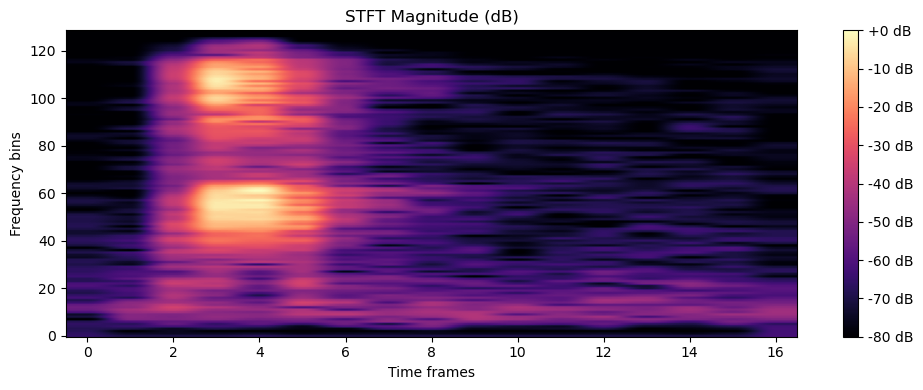

In [3]:
npy_file_path = "C:/Users/jta20/Documents/CollegeClasses/SeniorYear/CS541DeepLearning/SoundData/2k/3_0.npy"  # <-- update this to your actual file path

# Load the saved spectrogram
S_db = np.load(npy_file_path)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
print(S_db.shape)
plt.imshow(S_db, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude (dB)')
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()

(257, 17)


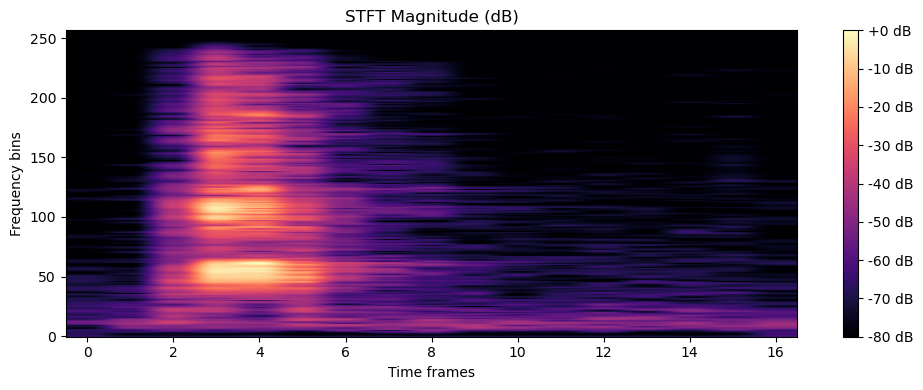

In [4]:
npy_file_path = "C:/Users/jta20/Documents/CollegeClasses/SeniorYear/CS541DeepLearning/SoundData/4k/3_0.npy"  # <-- update this to your actual file path

# Load the saved spectrogram
S_db = np.load(npy_file_path)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
print(S_db.shape)

plt.imshow(S_db, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude (dB)')
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()

(513, 17)


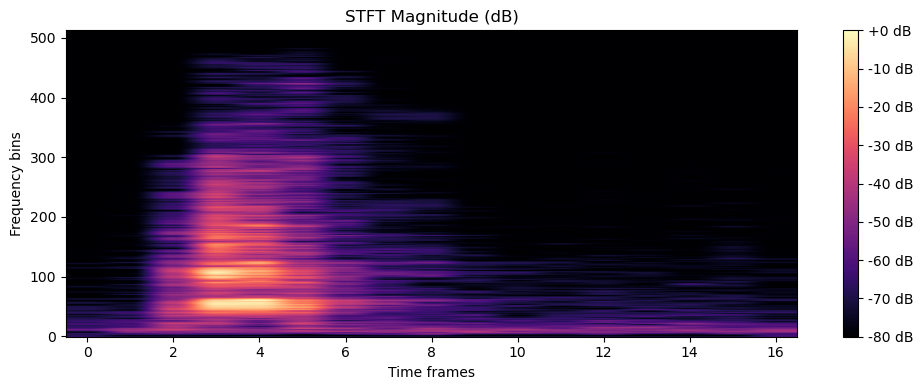

In [6]:
npy_file_path = "C:/Users/jta20/Documents/CollegeClasses/SeniorYear/CS541DeepLearning/SoundData/8k/3_0.npy"  # <-- update this to your actual file path

# Load the saved spectrogram
S_db = np.load(npy_file_path)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
print(S_db.shape)

plt.imshow(S_db, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude (dB)')
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()

(1025, 17)


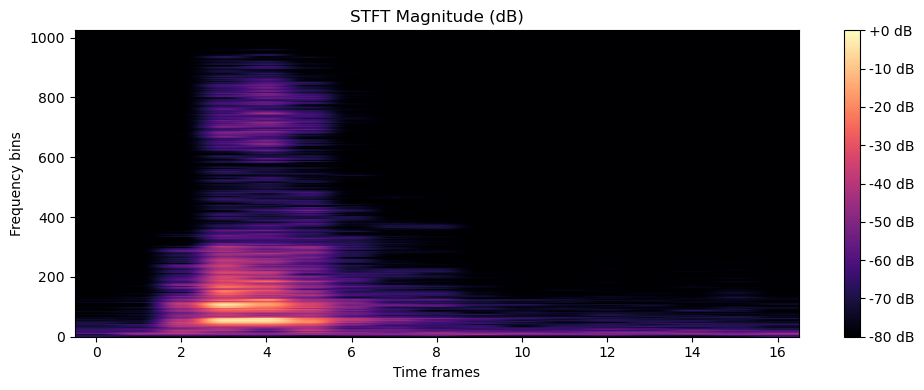

In [5]:
npy_file_path = "C:/Users/jta20/Documents/CollegeClasses/SeniorYear/CS541DeepLearning/SoundData/16k/3_0.npy"  # <-- update this to your actual file path

# Load the saved spectrogram
S_db = np.load(npy_file_path)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
print(S_db.shape)
plt.imshow(S_db, aspect='auto', origin='lower', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude (dB)')
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()

(1376, 17)


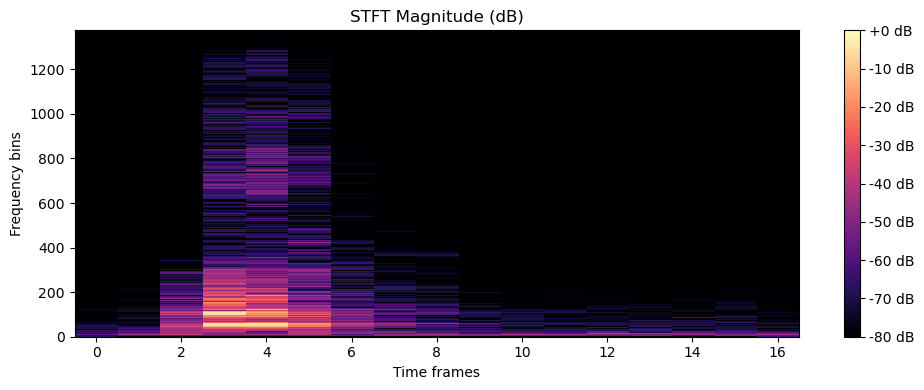

In [2]:
npy_file_path = "C:/Users/jta20/Documents/CollegeClasses/SeniorYear/CS541DeepLearning/SoundData/22k/3_0.npy"  # <-- update this to your actual file path

# Load the saved spectrogram
S_db = np.load(npy_file_path)

# Plotting the spectrogram
plt.figure(figsize=(10, 4))
print(S_db.shape)
plt.imshow(S_db, aspect='auto', origin='lower', cmap='magma', interpolation="nearest")
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude (dB)')
plt.xlabel('Time frames')
plt.ylabel('Frequency bins')
plt.tight_layout()
plt.show()